# IAM 961 HW3: QR decomp

Due Sunday Oct 13, 2022. Some basic Julia syntax tips are provided at the end of this notebook.

## Problem 1.
Write the following Julia functions for computing the QR decomposition of a matrix
  + `qrcgs(A)` via Classical Gram-Schmidt orthogonalization,
  + `qrmgs(A)` via Modified Gram-Schmidt orthogonalization, and
  + `qrhouse(A)` via Householder triangularization.
  
Each function should return the two matrices Q and R. 

You can assume that A is real, square, and full rank. If you like you can generalize in the following ways
  + to handle nonsquare matrices,
  + to return either the full or reduced QR for nonsquare A, depending on a flag (a boolean function argument),
  + to handle rank-deficient matrices, or nearly rank-deficient matrics,
  + to handle both real and complex matrices, or
  + to work with any floating-point numeric type.
  
I recommend you start with the simplest case: A is real, square, and full rank. 
Then, if you want expand the algorithm's capabilities one by one for optional problems 8-11. 
Test your algorithms on sample problems as you develop them. 
When you get errors, read the error messages for clues on what's gone wrong.

In [ ]:
using LinearAlgebra

function qrcgs(A)
    # fill in with CGS algorithm
    
    Q, R # return matrices Q and R
end

function qrmgs(A)
    # fill in with MGS algorithm
    
    Q,R
end

function qrhouse(A)
    # fill in Householder algorithm
    
    Q,R
end  

## Problem 2.
Test that your QR algorithms work correctly on a fairly small and well-conditioned matrix (e.g. a 5 x 5 matrix with normally distributed elements, `A = randn(5,5)`).  You should test that $Q$ is unitary and that $QR \approx A$. Verify to your own satisfaction that $R$ is upper-triangular. Make these tests as compact and readable as you can!

## Problem 3. 
Write a `backsub(R,b)` function that returns the solution $x$ of the upper-triangular system $Rx=b$ by backsubstitution. You can assume that $R$ is square and nonsingular. Test your backsubstitution function by solving an $Ax=b$ problem with your 5 x 5 $A$ matrix, one of your QR algorithms, and a known solution $x$. 


In [ ]:
function backsub(R, b)
    # fill in
end


## Problem 4.

Here's a function `A = randommatrix(m, n, kappa, T)` function that returns an m x n
random matrix with elements of type T, condition number κ, and exponentially graded
singular values (e.g.. $\sigma_1/\sigma_m = \kappa$ and $\sigma_{j+1}/\sigma_{j} = \text{const}$
for m x m square matrices). 

The element type defaults to `Float64`. Other choices
include `Float16, Float32, BigFloat, Complex{Float16}, Complex{Float32}, ...`.



In [ ]:
using LinearAlgebra

function randommatrix(m, n, κ, T=Float64)

    # construct singular value spectrum 
    p = min(m,n)
    c = κ^(-one(T)/(p-1))   # auxiliary variable for singular values
    σ = c.^(0:p-1)          # singular values log-scaled between 1 and 1/κ
    Σ = diagm(m,n,σ)   

    # construct randomly oriented unitary U,V of element type T    
    (U,tmp) = qr(randn(T,m,m)) # set U to random unitary matrix
    (V,tmp) = qr(randn(T,n,n)) # set V to random unitary matrix
    
    U*Σ*V'
end

Test that the function works correctly by constructing a small matrix `A` with κ=10^8
and then computing its condition number with `cond(A)`. 

In [ ]:
A = 

In [ ]:
using LinearAlgebra
#using GenericSVD # you'll need this to compute condition numbers of BigFloat matrices

cond(A)

## Problem 5.
Solve a large number of random $Ax=b$ problems using your QR decompositions
and `randommatrix` and `backsubs` functions, and produce a scatter 
plot of the normalized solution error  $\|\hat{x}-x\|/\|x\|$ versus $\kappa$. 
Plot data points from CGS in blue, MGS in red, and Householder in green.

Specifically: Construct a random $A$ matrix with $\kappa = 10^n$ where $n$ is 
a random real-valued number uniformly distributed between 0 and 18. 
Select a random $x$ vector with `x = randn(m,1)`, and then set $b = Ax$. For each of
the CGS, MGS, and Householder QR algorithms, compute the numerical solution $\hat{x}$ 
of $Ax=b$ via QR and then plot $\|\hat{x}-x\|/\|x\|$ versus $\kappa$ using log-log axes
and the color scheme specified above.  Do this for a hundred or so random $Ax=b$ problems and 
for a fairly small value of $m$ (perhaps 10 or 20). 

## Problem 6 
Comment on your results. What can you explain about the scatter plots 
based on the algorithms and their implementation in finite-precision arithmetic?
Or, contrariwise, what can you say about the algorithms based on the scatter 
plots? 

## Problem 7 (optional)
If you are curious, repeat problem 5 for a different value of $m$ 
(perhaps $m=100$). Does the dimensionality of the matrix (the value of $m$) 
make any difference?

## Problem 8 (optional)

You probably wrote your QR and backsolve algorithms assuming that matrix $A$ is square. Revise your functions to work on nonsquare $m \times n$ matrices as well.

## Problem 9 (optional)

The QR decompositon algorithms break down when the matrix $A$ is singular. Revise your CGS, MGS, and Householder QR algorithms to handle singular matrices gracefully. Show revised algorithms work well on singular or nearly singular matrices.

## Problem 10 (optional)

As shown in the lecture demo, the breakdown of CGS and MGS algorithms as $A$ becomes singular is a loss of orthogonality in the matrix $Q$. Can you think of any way to revise CGS or MGS to improve the orthogonality of $Q$, perhaps by rerunning CGS or MGS on the not-quite-orthogonal $Q$ matrix from a first pass of the algorithm? Or by recalculating each $q_j$ from the first-pass approximate $q_j$ in each pass of the ``for j = 1 to m`` loop? Does any such method work? Why or why not?

## Problem 11 (optional)

Julia uses 64-bit floating-point numbers by default. E.g. 

In [ ]:
A = randn(3,3)

However, you can specify 16-bit, 32-bit, and arbitrary-precision floating-point numbers if you want, e.g.

In [ ]:
@show Float16(pi)
@show Float32(pi)
@show Float64(pi)
@show BigFloat(pi)
A = BigFloat(1.0)*randn(3,3)

In [ ]:
setprecision(1024)  # 1024 bits
BigFloat(pi)

For optional problem 10, revise your CGS, MGS, Householder, and backsolve functions to work equally well on matrices of all floating-point number types. To get you started, here's how to revise your function signatures to access and use type information from function arguments.


In [ ]:
# Function f takes an m x n matrix as input and returns 
# a zero matrix of same size and numeric type

function f(A::Matrix{T}) where T
    (m,n) = size(A)
    Z = zeros(T, m,n)
end

@show f(ones(Float16,1,2))
@show f(ones(Float32,1,2))
@show f(ones(Float64,1,2))
@show f(ones(BigFloat,1,2))
@show f(ones(Complex{Float32},1,2));
@show f(ones(Complex{BigFloat},1,2));

## Julia syntax tips

In [1]:
using LinearAlgebra

In [2]:
# a basic function in Julia illustrating inputs, outputs
# error-checking, string interpolation, for loop, etc. 

"""
    `matvecmult(A,x)`

Compute the matrix-vector product `A*x`. Usage: `y = matvecmult(A,x)`.
"""
function matvecmult(A,x)
    m,n = size(A)
    
    if length(x) != m
        error("vector dim = $(length(x)) != $(m) = col dim A")
    end
    
    y = zeros(m)
    for j=1:n
        for i=1:m
            y[i] += A[i,j]*x[j]
        end
    end
    y
end

m = 4
A = randn(m,m)
x = randn(m)

@show A*x
@show matvecmult(A,x);

A * x = [-4.051533098870963, 1.1840678650351246, -0.60606020903652, 2.8215828335824433]
matvecmult(A, x) = [-4.051533098870963, 1.1840678650351246, -0.60606020903652, 2.8215828335824433]


In [4]:
# a function that returns two values in a tuple
function f(x)
    2x, x-1
end

s,t = f(4)

(8, 3)

In [5]:
# allocating an 2 x 3 matrix of zeros
A = zeros(2,3)

2×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [6]:
# getting the type of a numerical variable and allocating a matrix of that type
x = BigFloat(pi)
T = typeof(x)
A = zeros(T, 2, 3)

2×3 Matrix{BigFloat}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [7]:
# In Julia, variables are references (pointers) to objects.
# The assignment below creates a new reference to the same object.
# So a change made to one affects the other.
a = [0; 0; 0]
b = a

b[1] = 999

@show a
@show b;


a = [999, 0, 0]
b = [999, 0, 0]


In [8]:
# If you want an entirely new copy of a vector or matrix, use copy()
a = [0; 0; 0]
b = copy(a)

b[1] = 999;

@show a
@show b;


a = [0, 0, 0]
b = [999, 0, 0]


In [9]:
# Matrix-vector syntax is much like Matlab. But use square brackets!
A = zeros(4,4)
B = ones(4,3)
A[:, 1:3] = B

A

4×4 Matrix{Float64}:
 1.0  1.0  1.0  0.0
 1.0  1.0  1.0  0.0
 1.0  1.0  1.0  0.0
 1.0  1.0  1.0  0.0

In [10]:
# Use the dot function from the LinearAlgebra to compute the inner product 
# between two vectors, not the v1' * v2 you'd use in Matlab. This is necessary
# because Julia is careful about types and returns a scalar for the inner
# product. Matlab does the inner product as a matrix multiplication and 
# returns the scalar as a 1 x 1 matrix!

v1 = [1 ; 1 ; 1]
v2 = [2 ; 3 ; 4]

@show dot(v1, v2)
@show typeof(dot(v1, v2))

@show v1' * v2
@show typeof(v1' * v2)

dot(v1, v2) = 9
typeof(dot(v1, v2)) = Int64
v1' * v2 = 9
typeof(v1' * v2) = Int64


Int64

In [11]:
# Some thing that work in Matlab need different syntax in Julia,
# due to Julia's stricter typing 
A = rand(4,4)
B = rand(4,4)

# This will throw an error in Julia, though it works in Matlab
A[1,:] * B[:,3]  


LoadError: MethodError: no method matching *(::Vector{Float64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  *(::Any, ::Any, [31m::Any[39m, [31m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  *([31m::Diagonal[39m, ::AbstractVector)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/packages/julia-1.10.0/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mdiagonal.jl:283[24m[39m
[0m  *([31m::Number[39m, ::AbstractArray)
[0m[90m   @[39m [90mBase[39m [90m[4marraymath.jl:21[24m[39m
[0m  ...


In [12]:
# Julia's dot syntax is more consistent than Matlab's.
# If you want to apply a scalar function to a vector of values,
# you need to use dots

x = range(0.0, pi, length=10)
sin.(x)

10-element Vector{Float64}:
 0.0
 0.3420201433256687
 0.6427876096865393
 0.8660254037844386
 0.984807753012208
 0.984807753012208
 0.8660254037844387
 0.6427876096865395
 0.3420201433256689
 1.2246467991473532e-16

In [13]:
# This distinction is sometimes meaningful and important!
A = [1 0; 0 2]

# The exponential of a matrix....
exp(A)

2×2 Matrix{Float64}:
 2.71828  0.0
 0.0      7.38906

In [14]:
# ...compared to the elementwise exponential 
exp.(A)

2×2 Matrix{Float64}:
 2.71828  1.0
 1.0      7.38906

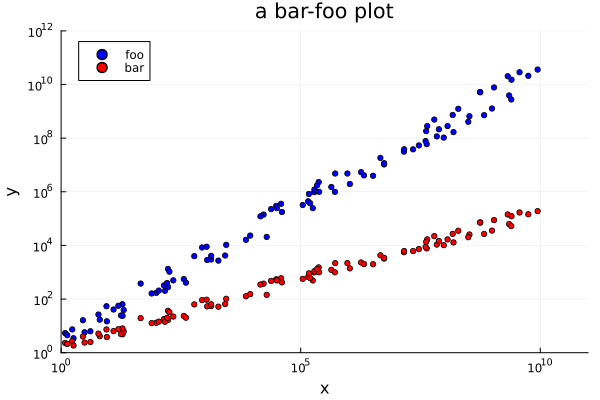

In [15]:
# A scatter plot with axis labels, logarithmic axes, etc. 

using Plots

N = 100
x = 10.0.^(10*rand(N))  # N random numbers between 1 and 10^20
y = x .* 10.0.^rand(N)  # multiply x's by randoms between 1 and 10
z = sqrt.(y)

scatter(x,y, color=:blue, label="foo", markersize=3)
scatter!(x,z, color=:red,  label="bar", markersize=3)
plot!(xscale=:log, yscale=:log, xlabel="x", ylabel="y")
plot!(legend=:topleft, title="a bar-foo plot")
plot!(xlim=(1,1e11), ylim=(1,1e12))